# Classification Tree

The point of this workbook is to create some fake data, then solve for the class using a classification tree.

None of the code here is taken from the Coursera course.  This exercise is completed in order to apply the lessons learned without code assistance as well as elaborate on some aspects.

For this workbook we're leaning hard on different Python packages.  To plot our decision trees we need to download graphviz (https://www.graphviz.org/), add the bin folder to our PATH environment variable, then restart our computer.  After all that we then had to pip install graphviz and pydotplus.  For fitting our classification tree we're using scikit learn.

## Create Some Fake Data to Fit

In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

So the idea here is to create some kind of data with a bit of structure and noise and then create a decision boundry to create our dependent variable.  The creation for X1 and X2, our independent variables don't necesarrily make a lot of sense, I'm just basically playing around to create some fake data to model.

In [17]:
#### CREATE FAKE DATA

# simulate some data
column1 = np.repeat(1, 10)
column2 = np.arange(-5,5,1)
column3 = (column2**2)/1
column4 = (column2**3)/10
column5 = (column2**4)/100
Xplay = np.matrix([column1,column2,column3,column4,column5])
Xplay = Xplay.transpose()
# save column1 from Xplay as our first modeling variable
X1 = Xplay[:,1]
# make up some parameters
B = np.matrix(np.array([1.0345,1.0961,-1.5109,1.0432,0.6657]))
B = B.transpose()
# create some fake noise
e = np.matrix(np.random.normal(0, 5, 10))
e = e.transpose()
# finally, create another fake variable using an arbitrary function with noise
X2 = Xplay*B + e

# now we're going to set some arbitrary line to pick our 1's and 0's
# and we'll add some noise so it's not perfectly linearly separable
bound = np.arange(min(X2),max(X2),(max(X2)-min(X2))/len(X2))
Y = []
for i in range(10):
    if X2[i] + np.random.normal(0, 90, 1) > bound[i]:
        Y.append(1)
    else:
        Y.append(0)

# reformat Y
Y = np.matrix([Y])
Y = Y.transpose()

Now lets take a look at the data we created and that we're going to try and model

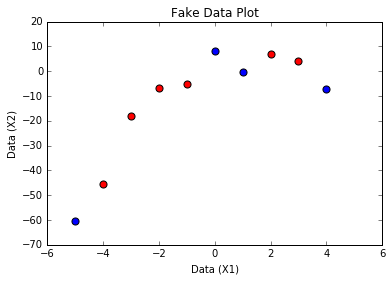

In [18]:
# plot our fake data to make sure it looks as we would expect

mask1 = Y!=1
mask0 = Y!=0

X1f = X1.flatten()
X2f = X2.flatten()

intercept = np.matrix(np.repeat(1, 10))
X = np.concatenate((intercept.transpose(),X1,X2),axis=1)

plt.scatter(X1f[mask1.ravel()], X2f[mask1.ravel()],c='red',s=50)
plt.scatter(X1f[mask0.ravel()], X2f[mask0.ravel()],c='blue',s=50)
plt.title('Fake Data Plot')
plt.xlabel("Data (X1)")
plt.ylabel("Data (X2)")
plt.show()

### Fit Classification Tree of Depth=1

I'm using scikit learn here because the concepts behind a decision tree are pretty straight forward, and can be reviewed in the Coursera Classification course, but are tedious to code.  Here I'm using scikit learn and graphviz and pydotplus to plot the results.

In [19]:
# imports
import time
from sklearn.tree import DecisionTreeClassifier

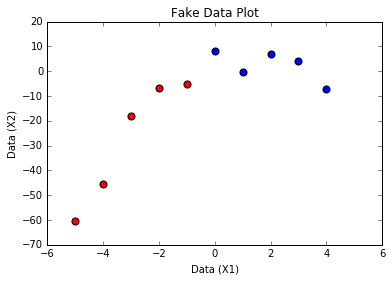

In [20]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

# training data
X = np.concatenate((X1,X2),axis=1)

# fit decision tree and calculate predictions
clf = DecisionTreeClassifier(max_depth=1)
model = clf.fit(X,Y)
predicted = model.predict(X)
predicted = np.matrix(predicted).transpose()

# compute masks for plotting
mask1 = predicted!=1
mask0 = predicted!=0

# reformat for plotting
X1f = X[:,0].flatten()
X2f = X[:,1].flatten()

# plot results
plt.scatter(X1f[mask1.ravel()], X2f[mask1.ravel()],c='red',s=50)
plt.scatter(X1f[mask0.ravel()], X2f[mask0.ravel()],c='blue',s=50)
plt.title('Fake Data Plot')
plt.xlabel("Data (X1)")
plt.ylabel("Data (X2)")
plt.show()

In [21]:
# imports
import graphviz 
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

### Visualize Classification Tree of Depth=1

Using Graphviz and pydotplus to plot results

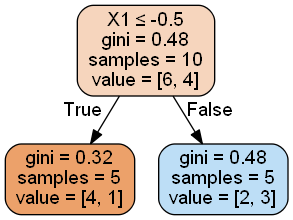

In [22]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['X1','X2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

So we're splitting at X1<=-0.5.  If X1<=-0.5 there are 4 zeros and 1 one, and X1>-0.5 we have 2 zeros and 3 ones.  Our split looks very intuitive!

### Let's try some more complicated data

In [23]:
#### CREATE FAKE DATA

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5,5,.1)
column3 = (column2**2)/1
column4 = (column2**3)/10
column5 = (column2**4)/100
Xplay = np.matrix([column1,column2,column3,column4,column5])
Xplay = Xplay.transpose()
# save column1 from Xplay as our first modeling variable
X1 = Xplay[:,1]
# make up some parameters
B = np.matrix(np.array([5.0345,2.0961,2.5109,1.0432,3.6657]))
B = B.transpose()
# create some fake noise
e = np.matrix(np.random.normal(0, 19, 100))
e = e.transpose()
# finally, create another fake variable using an arbitrary function with noise
X2 = Xplay*B + e

# now we're going to set some arbitrary line to pick our 1's and 0's
# and we'll add some noise so it's not perfectly linearly separable
bound = np.arange(min(X2),max(X2),(max(X2)-min(X2))/len(X2))
Y = []
for i in range(100):
    if X2[i] + np.random.normal(0, 40, 1) > bound[i]:
        Y.append(1)
    else:
        Y.append(0)

# reformat Y
Y = np.matrix([Y])
Y = Y.transpose()

Now lets take a look at the data we created and that we're going to try and model

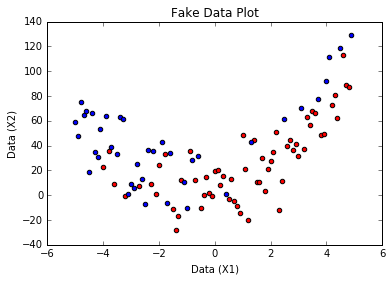

In [25]:
# plot our fake data to make sure it looks as we would expect

mask1 = Y!=1
mask0 = Y!=0

X1f = X1.flatten()
X2f = X2.flatten()

intercept = np.matrix(np.repeat(1, 100))
X = np.concatenate((intercept.transpose(),X1,X2),axis=1)

plt.scatter(X1f[mask1.ravel()], X2f[mask1.ravel()],c='red')
plt.scatter(X1f[mask0.ravel()], X2f[mask0.ravel()],c='blue')
plt.title('Fake Data Plot')
plt.xlabel("Data (X1)")
plt.ylabel("Data (X2)")
plt.show()

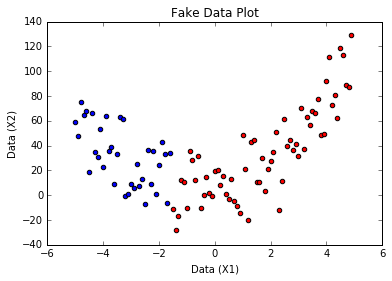

In [26]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

# training data
X = np.concatenate((X1,X2),axis=1)

# fit decision tree and calculate predictions
clf = DecisionTreeClassifier(max_depth=1)
model = clf.fit(X,Y)
predicted = model.predict(X)
predicted = np.matrix(predicted).transpose()

# compute masks for plotting
mask1 = predicted!=1
mask0 = predicted!=0

# reformat for plotting
X1f = X[:,0].flatten()
X2f = X[:,1].flatten()

# plot results
plt.scatter(X1f[mask1.ravel()], X2f[mask1.ravel()],c='red')
plt.scatter(X1f[mask0.ravel()], X2f[mask0.ravel()],c='blue')
plt.title('Fake Data Plot')
plt.xlabel("Data (X1)")
plt.ylabel("Data (X2)")
plt.show()

### Again, Visualize Classification Tree of Depth=1

Using Graphviz and pydotplus to plot results

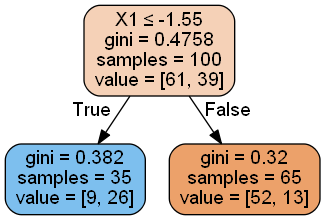

In [27]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=['X1','X2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Our split looks good again!  Our split looks about where we would expect it to be :).